# Mode-Turbulence Coupling: Numerical Analysis
# Plots for paper

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import random
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.interpolate as interpolate
from scipy.integrate import RK45
import statistics

### Physical Parameters

In [2]:
# mach number Ma
Ma = 0.1
K = 1

Q = 0.8
q = .7

### Functions of Ma

In [3]:
meandeltaT = 2*np.pi / Ma

# variables for generating F1
meanF1 = 0
stdF1 = Ma**3 / (2 * np.pi)
limitF1 = 1 / (2 * np.pi)

### Calculation parameters

In [4]:
L = 10
Tmax = 10**3
N = 1
m = 100

Tr = K * meandeltaT

### Calculation relations

In [5]:
# Tmax = 2 * pi * M
# delt = N * deltaT

### Initial Conditions

In [6]:
# initial conditions A(0)=1/2*std_F2, dA/dT(0)=0
initial_dAdT = 0
initial_AT = 0.1

In [7]:
n_bins = 200

axis_font = {'size':'30'}
title_font = {'size':'40'}

### Functions

In [8]:
def funAmp(dAdT, AT):
    #A is the amplitude
    A=[]
    #t is time
    t=[]
    ttemp=0
    while (ttemp < Tmax):
        A.append(initial_AT * math.cos(ttemp) * math.exp(- (Q / (2*q) * math.sin(q * ttemp))))
        t.append(ttemp)
        ttemp+=0.01 
    return A, t

In [9]:
def Funplots(t, A, f1, f2):

    plt.figure(figsize=(40,10))    
    plt.plot(t, f1, 'k')
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    #plt.ticklabel_format(style='sci', axis = 'both', scilimits=(0,0))
    plt.xlabel(r'$\tau$', **axis_font)
    plt.ylabel('F\u2081', **axis_font)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(40,10))
    plt.plot(t, A, 'k')
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    #plt.ticker.ScalarFormatter(set_scientific(self, b))
    #plt.ticklabel_format(style='sci', axis = 'both', scilimits=(0,0))
    #plt.rcParams['font.size']=7
    plt.xlabel(r'$\tau$', **axis_font)
    plt.ylabel('Amplitude', **axis_font)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(40,10))
    plt.plot(t, f2, 'k')
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    #plt.ticklabel_format(style='sci', axis = 'both', scilimits=(0,0))
    plt.xlabel(r'$\tau$', **axis_font)
    plt.ylabel('F\u2082', **axis_font)
    plt.tight_layout()
    plt.show()

##  Amplitude of mode, F1, F2, log(A) vs. Time

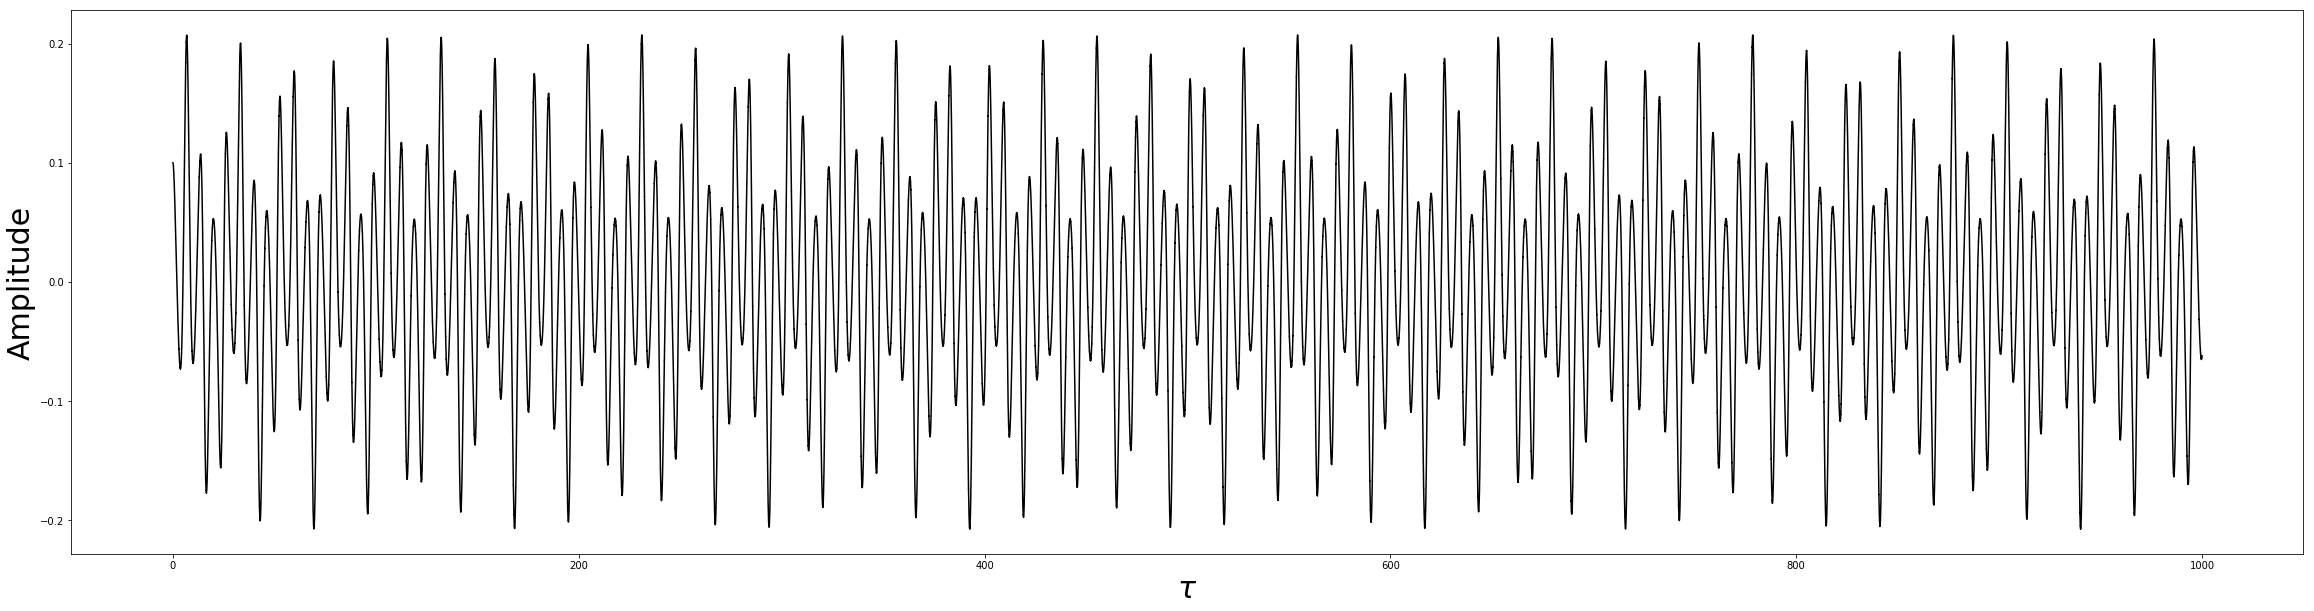

-0.061923420944907125


In [10]:
# Runge Kutta

# A = A0 * cos (T) * exp( - (Q/(2*q)) * sin(q*T) )
# A' = B
# B' = f(T, A, B) = - F1(T) * B - A
# A(0) = 0.1
# A'(0) = B = 0

A = 0.1

t = 0.0
B = 0 

#time step dT
dT = 0.01

Atest=[]
Ttest=[]

while ( t < Tmax ):
    Atest.append(A)
    Ttest.append(t)
    m1 = B
    k1 = - Q * math.cos(q*t) * B - A
    m2 = B + ( dT / 2) * k1
    t_2 = t + (dT / 2)
    Ttest.append(t_2)
    A_2 = A + (dT / 2) * m1
    Atest.append(A_2)
    B_2 = m2
    k2 = - Q * math.cos(q*t_2) * B_2 - A_2
    m3 = B + (dT / 2) * k2
    t_3 = t + (dT / 2)
    Ttest.append(t_3)
    A_3 = A + (dT / 2) * m2
    Atest.append(A_3)
    B_3 = m3
    k3 = - Q * math.cos(q*t_3) * B_3 - A_3
    m4 = B + dT *k3
    t_4 = t + dT
    Ttest.append(t_4)
    A_4 = A + dT * m3
    Atest.append(A_4)
    B_4 = m4
    k4 = - Q * math.cos(q*t_4) * B_4 - A_4
    t = t + dT
    A = A + (dT / 6.) * (m1 + (2. * m2) + (2. * m3) + m4)
    B = B + (dT / 6.) * (k1 + (2. * k2) + (2. * k3) + k4)

        
plt.figure(figsize=(40,10))
plt.plot(Ttest, Atest, 'k')
plt.xlabel(r'$\tau$', **axis_font)
plt.ylabel('Amplitude', **axis_font)
plt.show()

print(Atest[-1])

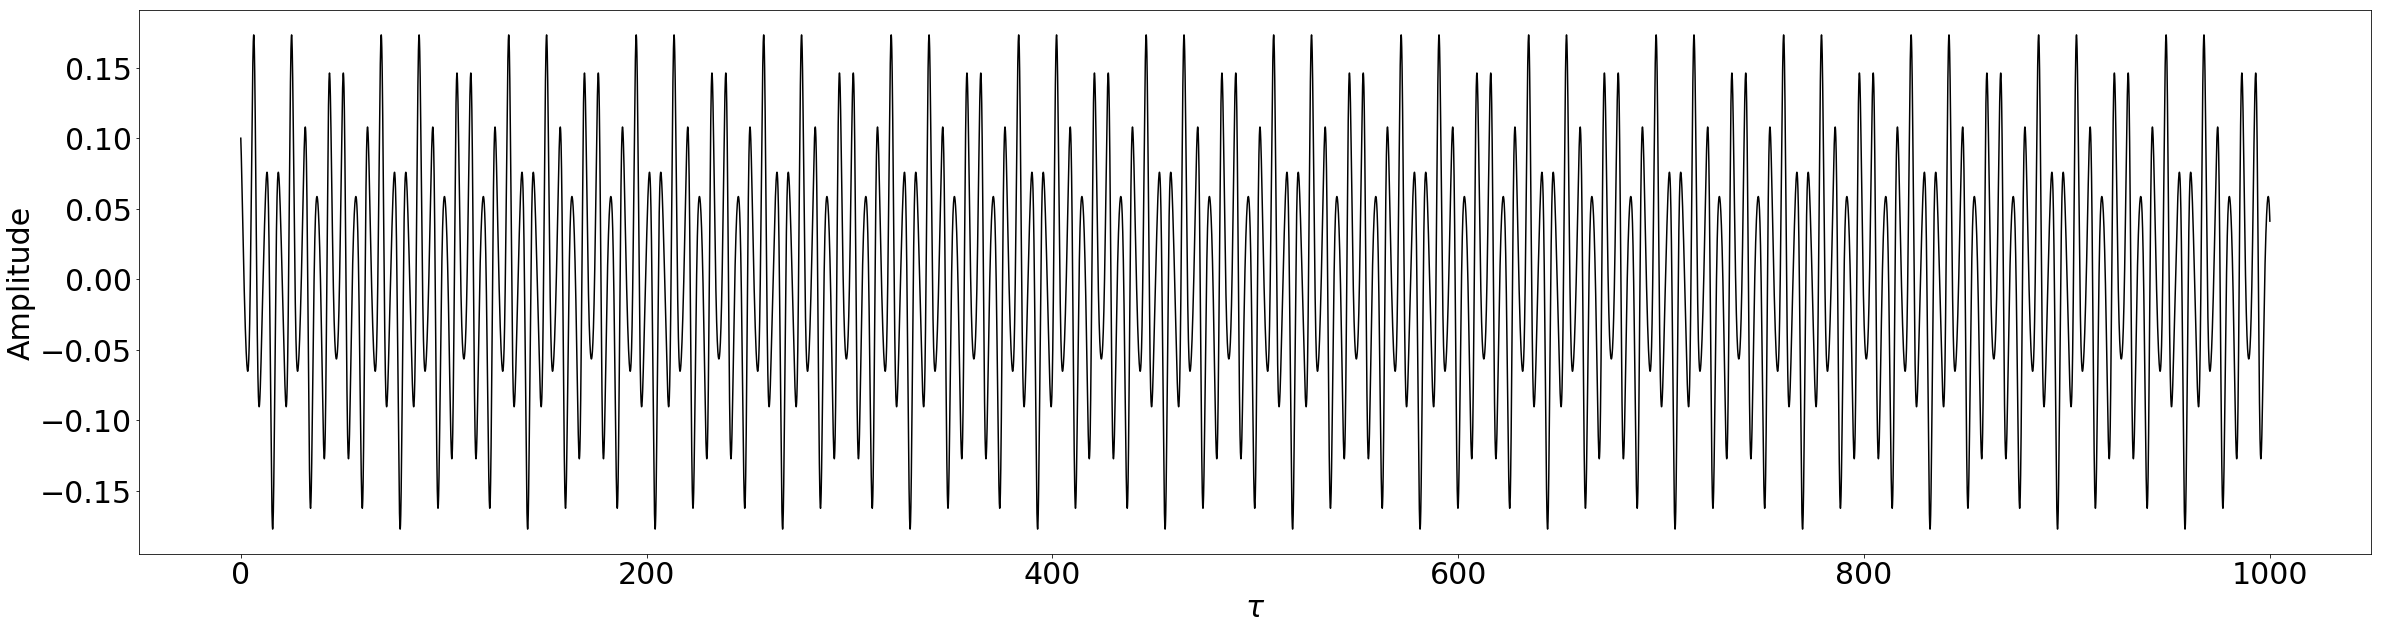

T(max) = 1000
0.04121287651481454


In [11]:
plt.figure(figsize=(40,10))
A, t =funAmp(initial_dAdT, initial_AT)

plt.plot(t, A, 'k')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
#plt.ticklabel_format(style='sci', axis = 'both', scilimits=(0,0))
#plt.Axes.offsetText.set_fontsize(24)
plt.xlabel(r'$\tau$', **axis_font)
plt.ylabel('Amplitude', **axis_font)
plt.show()

print("T(max) =", Tmax)
print(A[-1])

(array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 11 Text yticklabel objects>)

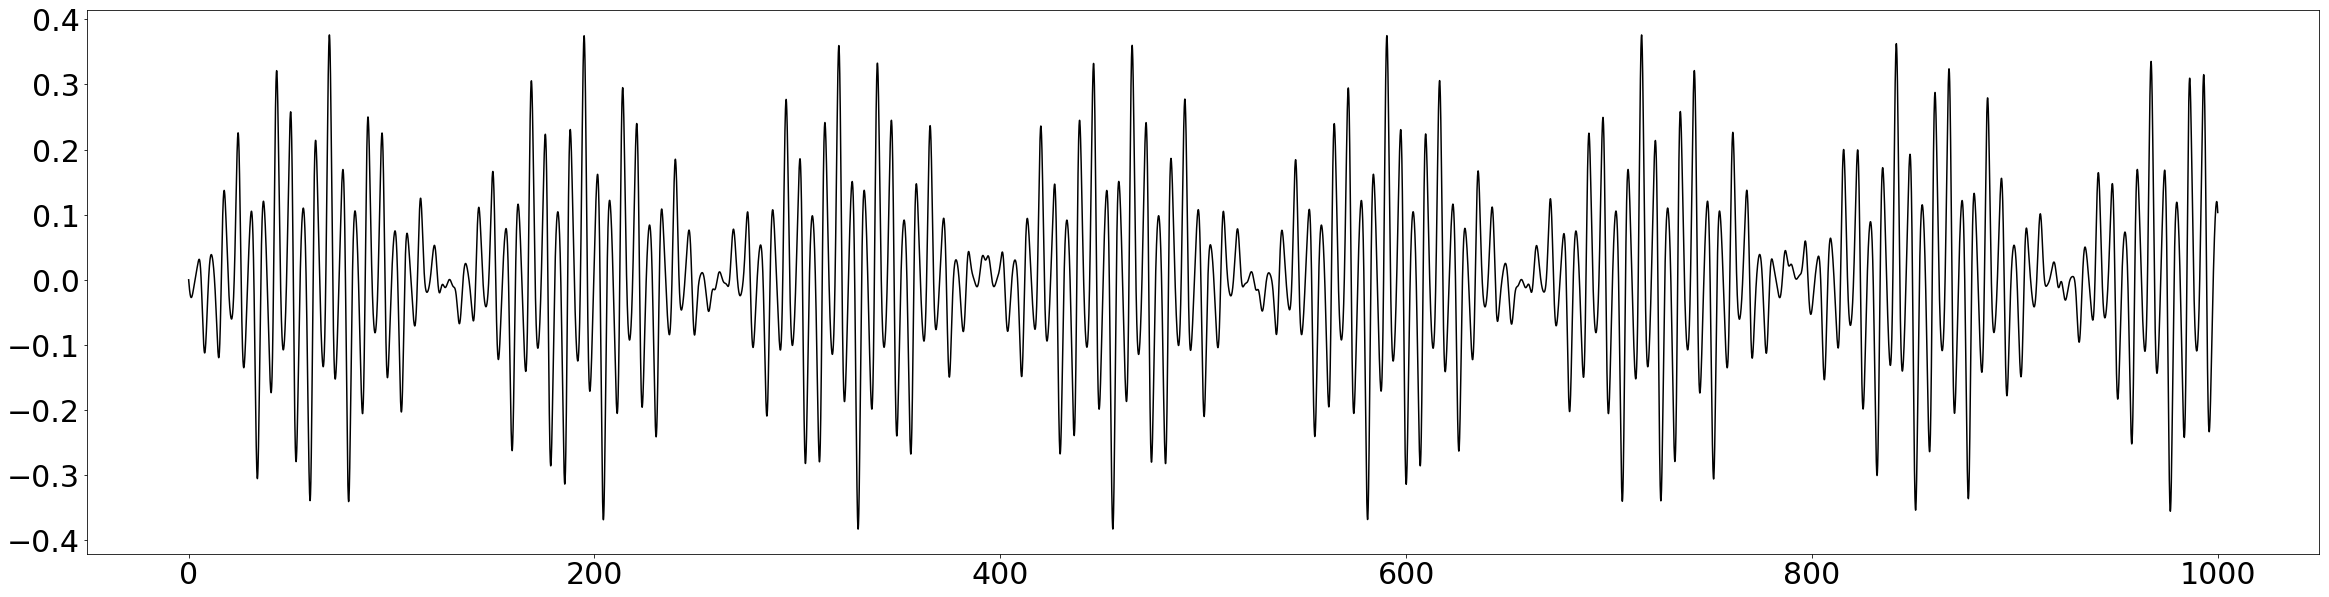

In [12]:
plt.figure(figsize=(40,10))

Asub=[]

for i in range(len(A)):
    Asub.append(A[i]-Atest[4*i])

plt.plot(t, Asub, 'k')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)